In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-playing-surface-analytics/PlayList.csv
/kaggle/input/nfl-playing-surface-analytics/InjuryRecord.csv
/kaggle/input/nfl-playing-surface-analytics/PlayerTrackData.csv


## ***NFL ANALYTICS***

In this challenge, We have to investigate the relationship between the playing surface and the injury and performance of National Football League (NFL) athletes and to examine factors that may contribute to lower extremity injuries.


In the NFL, 12 stadiums have fields with synthetic turf. Recent investigations of lower limb injuries among football athletes have indicated significantly higher injury rates on synthetic turf compared to natural turf for whatever reasons. 

In this notebook I will only investigate the chances of injuries to be occured to any typed player at any given positon.

So, Lets start. 

In [2]:
#Importing Libraries to expose data insights

#data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import math

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py

In [3]:
Injury_Rec = pd.read_csv('../input/nfl-playing-surface-analytics/InjuryRecord.csv')
PlayList = pd.read_csv('../input/nfl-playing-surface-analytics/PlayList.csv')

In [4]:
Injury_Rec.head()

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1


## **Explaination Of Above Data:**

Bodypart: Injured Body Part (Knee, Ankle, Foot, etc.)

Surface: Playing surface area at the time of injury.

DM_M1: One hot encoding, indicates 1 or more days missed due to injury

DM_M7: One hot encoding, indicates 7 or more days missed due to injury

DM_M28: One hot encoding, indicates 28 or more days missed due to injury

DM_M42: One hot encoding, indicates 42 or more days missed due to injury

In [5]:
PlayList.head()

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,26624,26624-1,26624-1-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,1,QB,QB
1,26624,26624-1,26624-1-2,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,2,QB,QB
2,26624,26624-1,26624-1-3,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,3,QB,QB
3,26624,26624-1,26624-1-4,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,4,QB,QB
4,26624,26624-1,26624-1-5,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,5,QB,QB


## **Explaination Of Above Data:**


RosterPosition: Player's roster position i.e. Running Back

PlayerDay: Time line of players participation in games

Player Game: Uniquely identifies the player's game

Stadium Type: open, close, outdoor, etc

Field type: Natural or synthetic

Temperature: On field temperature at start of the game. Not provided in dome/indoor stadiums.

Weather: Weather conditions

Playtype: categorical description of play type.

PlayerGamePlay: running count of plays a player has participated during the game

Position: Player position for eg. RB,QB,DE etc.

PositionGroup: Player position group for the position held during the play. 


### Lets gain some insights from data through beautiful visuals

In [6]:
df = Injury_Rec.groupby('BodyPart').agg({'PlayerKey': ['count']})
df = df.sort_values(('PlayerKey', 'count'), ascending=True).sort_index()
data = go.Bar(x=df.index, y=df['PlayerKey']['count'].sort_values(),marker_color="mediumPurple",name='counts')

layout = go.Layout(dict(title = "Which Body Part got Injured frequently ?",
                        xaxis = dict(title = "Injured BodyParts",
                                     #marker = list(color = "rgb(195, 195, 195)"),
                                     color="Purple",
                                     showgrid=True,
                                     zeroline=True,
                                     showline=True,),
                        yaxis = dict(title = 'Counts',
                                     color="Purple",
                                     showgrid=True,
                                     zeroline=True,
                                     showline=True,)))

py.iplot(dict(data=data, layout=layout))

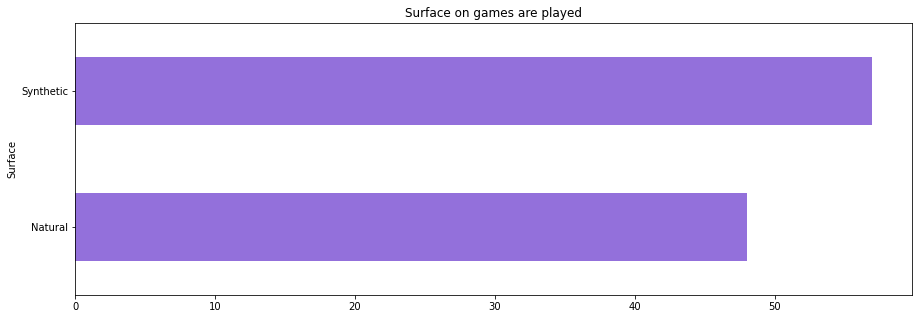

In [7]:
Injury_Rec.groupby('Surface').count()['PlayerKey'].sort_values().plot(kind='barh', figsize=(15, 5), title='Surface on games are played',color='mediumPurple')
plt.show()

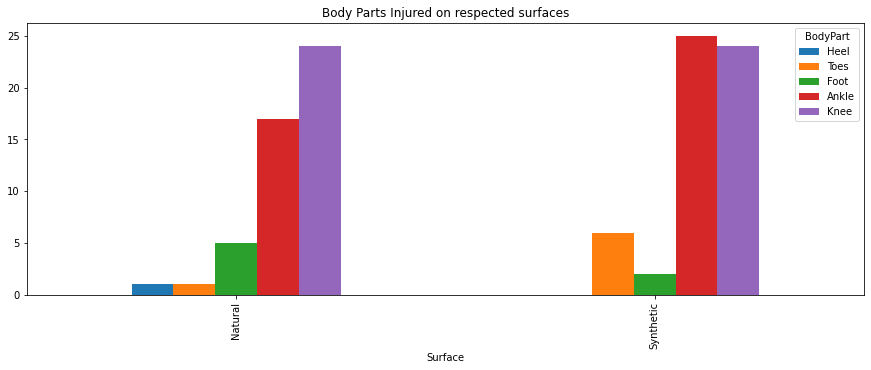

In [8]:
Injury_Rec.groupby(['BodyPart','Surface']).count() \
.unstack('BodyPart')['PlayerKey'].T.sort_values('Natural')\
.T.sort_values('Ankle').plot(kind='bar', figsize=(15, 5), title='Body Parts Injured on respected surfaces')

plt.show()

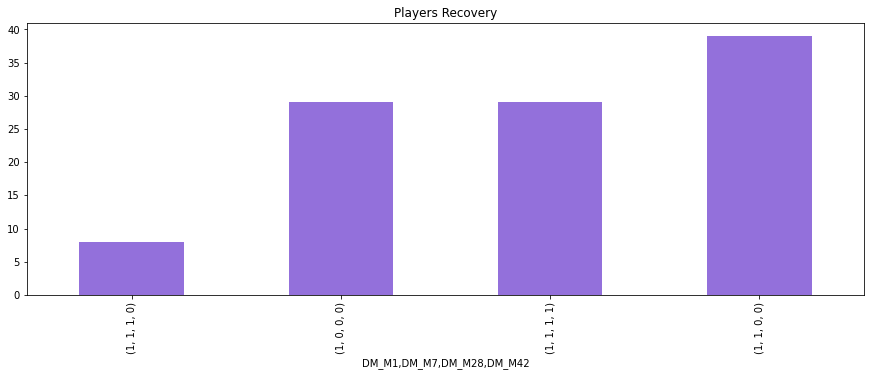

In [9]:
Injury_Rec.groupby(['DM_M1','DM_M7','DM_M28','DM_M42']).count()['PlayerKey'].sort_values().plot(kind='bar', figsize=(15, 5), title='Players Recovery',color='mediumPurple')
plt.show()

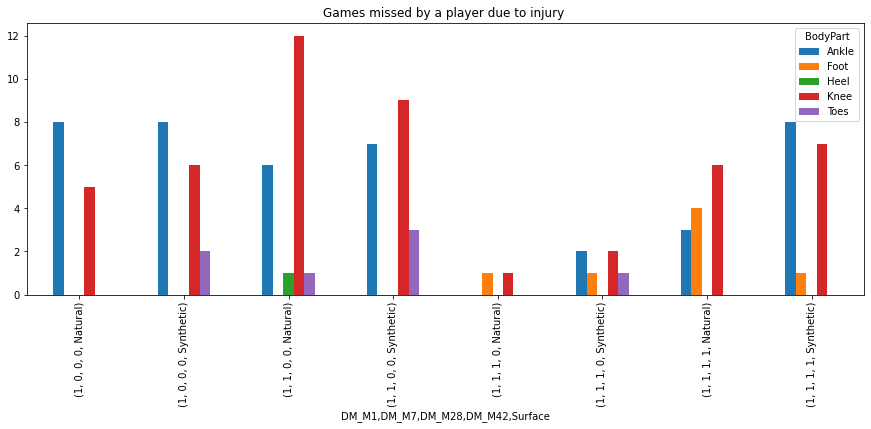

In [10]:
Injury_Rec.groupby(['DM_M1','DM_M7','DM_M28','DM_M42','BodyPart','Surface']).count() \
.unstack('BodyPart')['PlayerKey']\
.plot(kind='bar', figsize=(15, 5), title='Games missed by a player due to injury ')

plt.show()

## **Observations**

- 57 matches were played in synthetic field while others on natural field.

- Out of 105 injuries, Toes injury with 48 numbers have been the highest amongst them all.

- Ankle and toes injuries in synthetic field increases drastically.

- No heel injury in synthetic field recorded.

- Knee injuries remains almost same on both the fields.

- Foot injury got decreased in sythetic field.


In [11]:
# Thats all for InjuryRecord dataset
PlayList.head()

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,26624,26624-1,26624-1-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,1,QB,QB
1,26624,26624-1,26624-1-2,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,2,QB,QB
2,26624,26624-1,26624-1-3,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,3,QB,QB
3,26624,26624-1,26624-1-4,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,4,QB,QB
4,26624,26624-1,26624-1-5,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,5,QB,QB


In [12]:
df = PlayList[['PlayKey','PlayType']].drop_duplicates()
df = df.groupby('PlayType').agg({'PlayKey': ['count']})
df = df.sort_values(('PlayKey', 'count'), ascending=True).sort_index()
data = go.Bar(x=df.index, y=df['PlayKey']['count'],marker_color="cornflowerblue",name='counts')

layout = go.Layout(dict(title = "Most frequent player types",
                        xaxis = dict(title = "Player Type",
                                     #marker = list(color = "rgb(195, 195, 195)"),
                                     color="Black",
                                     showgrid=True,
                                     zeroline=True,
                                     showline=True,),
                        yaxis = dict(title = 'Counts',
                                     color="Black",
                                     showgrid=True,
                                     zeroline=True,
                                     showline=True,)))

py.iplot(dict(data=data, layout=layout))

In [13]:
#Lets merge both of them to get insights
inj_detailed_merged = Injury_Rec.merge(PlayList)

In [14]:
inj_detailed_merged.head()

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1,Linebacker,29,4,Indoors,Synthetic,84,Cloudy,Punt,32,OLB,LB
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0,Linebacker,50,7,Open,Natural,76,Partly Cloudy,Punt,26,OLB,LB
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1,Safety,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,70,SS,DB
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0,Linebacker,15,3,Outdoor,Natural,80,Cloudy,Punt,30,LB,LB
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1,Wide Receiver,32,5,Retractable Roof,Synthetic,89,Partly Cloudy,Kickoff,69,WR,WR


In [15]:
df = inj_detailed_merged.groupby('RosterPosition').agg({'PlayerKey': ['count']})
df = df.sort_values(('PlayerKey', 'count'), ascending=True).sort_index()
data = go.Bar(x=df.index, y=df['PlayerKey']['count'],marker_color="cornflowerblue",name='counts')

layout = go.Layout(dict(title = "Most frequent postions of the players",
                        xaxis = dict(title = "Player Positions",
                                     #marker = list(color = "rgb(195, 195, 195)"),
                                     color="Black",
                                     showgrid=True,
                                     zeroline=True,
                                     showline=True,),
                        yaxis = dict(title = 'Counts',
                                     color="Black",
                                     showgrid=True,
                                     zeroline=True,
                                     showline=True,)))

py.iplot(dict(data=data, layout=layout))

In [16]:
df = inj_detailed_merged.groupby('PlayType').agg({'PlayerKey': ['count']})
df = df.sort_values(('PlayerKey', 'count'), ascending=True).sort_index()
data = go.Bar(x=df.index, y=df['PlayerKey']['count'],marker_color="cornflowerblue",name='counts')

layout = go.Layout(dict(title = "Most frequent player types",
                        xaxis = dict(title = "Player Positions",
                                     #marker = list(color = "rgb(195, 195, 195)"),
                                     color="Black",
                                     showgrid=True,
                                     zeroline=True,
                                     showline=True,),
                        yaxis = dict(title = 'Counts',
                                     color="Black",
                                     showgrid=True,
                                     zeroline=True,
                                     showline=True,)))

py.iplot(dict(data=data, layout=layout))

### What are the main factors to cause injuries ??:

In [17]:
ds = inj_detailed_merged.groupby(['RosterPosition','BodyPart']).count() \
.unstack('BodyPart')['PlayerKey']\
.T.apply(lambda x: x / x.sum())\
.sort_values('BodyPart').T.sort_values('Ankle', ascending=False)

In [18]:
data = go.Bar(x=ds['Ankle'], y=ds.index,marker_color="blue",name='counts',orientation = 'h')

layout = go.Layout(dict(title = "Most frequent player positions having Ankle Injury",
                        xaxis = dict(title = "Count",
                                     #marker = list(color = "rgb(195, 195, 195)"),
                                     color="Black",
                                     showgrid=True,
                                     zeroline=True,
                                     showline=True,),
                        yaxis = dict(title = 'Player Postions',
                                     color="Black",
                                     showgrid=True,
                                     zeroline=True,
                                     showline=True,)))

py.iplot(dict(data=data, layout=layout))

In [19]:
data = go.Bar(x=ds['Foot'], y=ds.index,marker_color="orange",name='counts',orientation = 'h')

layout = go.Layout(dict(title = "Most frequent player positions having Foot Injury",
                        xaxis = dict(title = 'Counts',
                                     #marker = list(color = "rgb(195, 195, 195)"),
                                     color="Black",
                                     showgrid=True,
                                     zeroline=True,
                                     showline=True,),
                        yaxis = dict(title = "Player Positions",
                                     color="Black",
                                     showgrid=True,
                                     zeroline=True,
                                     showline=True,)))

py.iplot(dict(data=data, layout=layout))

In [20]:
data = go.Bar(x=ds['Knee'], y=ds.index,marker_color="green",name='counts',orientation = 'h')

layout = go.Layout(dict(title = "Most frequent player positions having Knee Injury",
                        xaxis = dict(title = 'Counts',
                                     #marker = list(color = "rgb(195, 195, 195)"),
                                     color="Black",
                                     showgrid=True,
                                     zeroline=True,
                                     showline=True,),
                        yaxis = dict(title = "Player Positions",
                                     color="Black",
                                     showgrid=True,
                                     zeroline=True,
                                     showline=True,)))

py.iplot(dict(data=data, layout=layout))

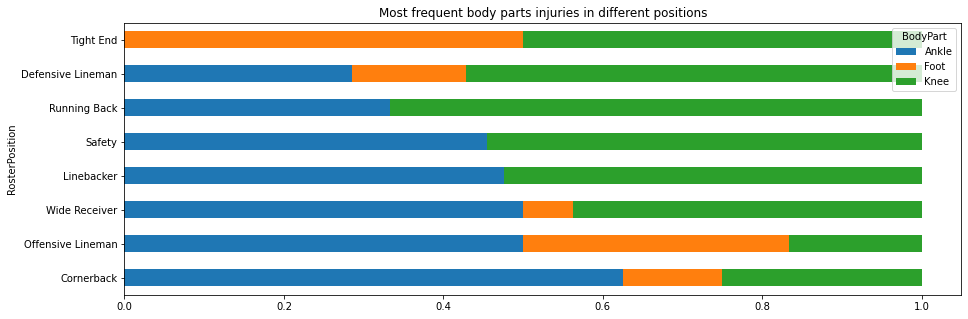

In [21]:
#Lets get a merged perspective of all of these factors

ds.plot(kind='barh', figsize=(15, 5), title='Most frequent body parts injuries in different positions',stacked=True)

plt.show() 

In [22]:
# 'PlayType' & 'BodyPart'

df = inj_detailed_merged.groupby(['PlayType','BodyPart']).count() \
.unstack('BodyPart')['PlayerKey']\
.T.apply(lambda x: x / x.sum())\
.sort_values('BodyPart').T.sort_values('Ankle', ascending=False)\

In [23]:
data = go.Bar(x=df['Ankle'], y=df.index,marker_color="blue",name='counts',orientation = 'h')

layout = go.Layout(dict(title = "Most frequent player types having Ankle Injury",
                        xaxis = dict(title = "Count",
                                     #marker = list(color = "rgb(195, 195, 195)"),
                                     color="Black",
                                     showgrid=True,
                                     zeroline=True,
                                     showline=True,),
                        yaxis = dict(title = 'Player Postions',
                                     color="Black",
                                     showgrid=True,
                                     zeroline=True,
                                     showline=True,)))

py.iplot(dict(data=data, layout=layout))

In [24]:
data = go.Bar(x=df['Foot'], y=df.index,marker_color="orange",name='counts',orientation = 'h')

layout = go.Layout(dict(title = "Most frequent player types having Foot Injury",
                        xaxis = dict(title = 'Counts',
                                     #marker = list(color = "rgb(195, 195, 195)"),
                                     color="Black",
                                     showgrid=True,
                                     zeroline=True,
                                     showline=True,),
                        yaxis = dict(title = "Player Positions",
                                     color="Black",
                                     showgrid=True,
                                     zeroline=True,
                                     showline=True,)))

py.iplot(dict(data=data, layout=layout))

In [25]:
data = go.Bar(x=df['Knee'], y=df.index,marker_color="green",name='counts',orientation = 'h')

layout = go.Layout(dict(title = "Most frequent player types having Knee Injury",
                        xaxis = dict(title = 'Counts',
                                     #marker = list(color = "rgb(195, 195, 195)"),
                                     color="Black",
                                     showgrid=True,
                                     zeroline=True,
                                     showline=True,),
                        yaxis = dict(title = "Player Positions",
                                     color="Black",
                                     showgrid=True,
                                     zeroline=True,
                                     showline=True,)))

py.iplot(dict(data=data, layout=layout))

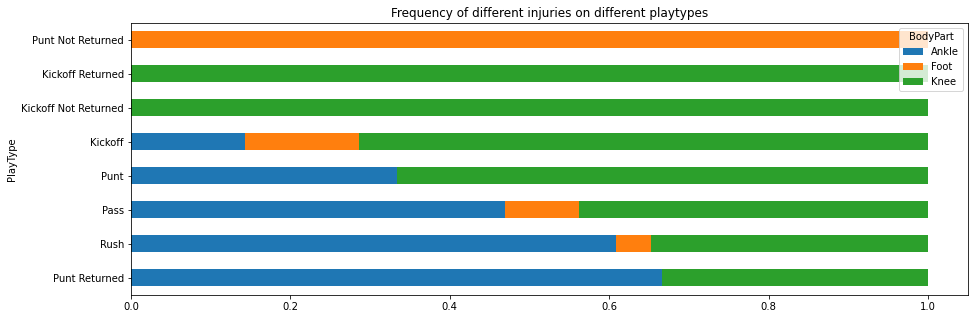

In [26]:
#Lets get a merged perspective of all of these factors

inj_detailed_merged.groupby(['PlayType','BodyPart']).count() \
.unstack('BodyPart')['PlayerKey']\
.T.apply(lambda x: x / x.sum())\
.sort_values('BodyPart').T.sort_values('Ankle', ascending=False)\
.plot(kind='barh', figsize=(15, 5), title='Frequency of different injuries on different playtypes',stacked=True)

plt.show()

In [27]:
# 'RosterPosition' & 'Surface'

df = inj_detailed_merged.groupby(['RosterPosition','Surface']).count() \
.unstack('Surface')['PlayerKey']\
.T.apply(lambda x: x / x.sum())\
.sort_values('Surface').T.sort_values('Natural', ascending=False)


In [28]:
data = go.Bar(x=df['Natural'], y=df.index,marker_color="blue",name='counts',orientation = 'h')

layout = go.Layout(dict(title = "Most frequent player positions in Natural Field Type",
                        xaxis = dict(title = "Count",
                                     #marker = list(color = "rgb(195, 195, 195)"),
                                     color="Black",
                                     showgrid=True,
                                     zeroline=True,
                                     showline=True,),
                        yaxis = dict(title = 'Field Type',
                                     color="Black",
                                     showgrid=True,
                                     zeroline=True,
                                     showline=True,)))

py.iplot(dict(data=data, layout=layout))

In [29]:
data = go.Bar(x=df['Synthetic'], y=df.index,marker_color="orange",name='counts',orientation = 'h')

layout = go.Layout(dict(title = "Most frequent player positions in Synthetic Field Type",
                        xaxis = dict(title = 'Counts',
                                     #marker = list(color = "rgb(195, 195, 195)"),
                                     color="Black",
                                     showgrid=True,
                                     zeroline=True,
                                     showline=True,),
                        yaxis = dict(title = "Player Positions",
                                     color="Black",
                                     showgrid=True,
                                     zeroline=True,
                                     showline=True,)))

py.iplot(dict(data=data, layout=layout))

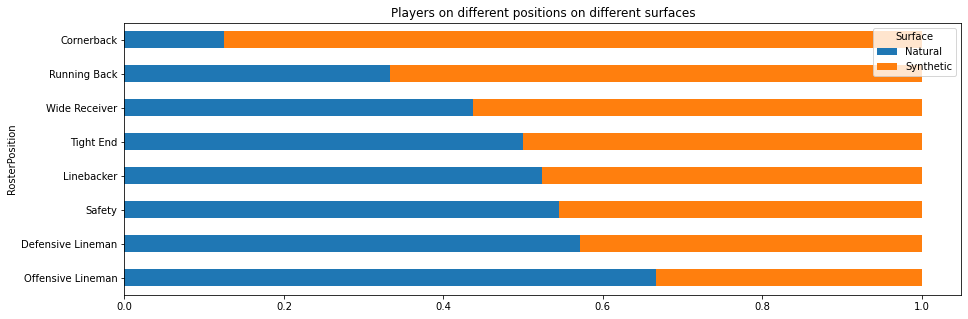

In [30]:
#Lets get a merged perspective of all of these factors
inj_detailed_merged.groupby(['RosterPosition','Surface']).count() \
.unstack('Surface')['PlayerKey']\
.T.apply(lambda x: x / x.sum())\
.sort_values('Surface').T.sort_values('Natural', ascending=False)\
.plot(kind='barh', figsize=(15, 5), title='Players on different positions on different surfaces',stacked=True)

plt.show()

## Observation & Conclusion:

- No ankle injury to tightend positioned players, Highest recorded to cornerback positioned players.

- No foot injuries to "Running back", "Safety" and "line backer" while highest ankle injuries to tight end positioned players.

- "Running back", "Safety" and "line backer" have highest knee injuries recorded.

- No ankle injuries to "putNotReturned", "Kickoff" and "KickOff not returned" type players while highest ankle injuries to "punt return type" player.

- "PutNotReturned" type players have highest foot injuries.

- Knee injuries have been recorded most to "kick off" and "kick off return" typed players.